# **Pronóstico (Árboles de decisión)**

Nombre: Hernández Luis Sergio Ángel

No. Cuenta: 315289538

Email: angelhdz104@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [3]:
# Para Cemex
DataCemex = yf.Ticker('CX')

In [4]:
CemexHist = DataCemex.history(start = '2012-1-1', end = '2022-11-25', interval='1d')
CemexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,4.342885,4.420853,4.335088,4.366275,22231529,0.0,0.0
2012-01-04,4.366275,4.459838,4.280510,4.428651,30384865,0.0,0.0
2012-01-05,4.389666,4.405260,4.303900,4.342885,24282231,0.0,0.0
2012-01-06,4.374072,4.413057,4.179149,4.233728,29589232,0.0,0.0
2012-01-09,4.241525,4.280510,4.132368,4.163556,16019571,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-17,4.460000,4.530000,4.450000,4.500000,6641900,0.0,0.0
2022-11-18,4.550000,4.550000,4.470000,4.500000,2148300,0.0,0.0
2022-11-21,4.430000,4.460000,4.370000,4.400000,1655400,0.0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
CemexHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2743 entries, 2012-01-03 to 2022-11-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2743 non-null   float64
 1   High          2743 non-null   float64
 2   Low           2743 non-null   float64
 3   Close         2743 non-null   float64
 4   Volume        2743 non-null   int64  
 5   Dividends     2743 non-null   float64
 6   Stock Splits  2743 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 171.4 KB


In [6]:
CemexHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2743.000000,2743.000000,2743.000000,2743.000000,2.743000e+03,2743.000000,2743.000000
mean,6.817052,6.924130,6.709045,6.813789,1.141537e+07,0.000018,0.002275
std,2.355263,2.368977,2.340676,2.353518,7.512961e+06,0.000955,0.048596
min,1.740000,1.790000,1.550000,1.630000,1.166500e+06,0.000000,0.000000
25%,4.794678,4.881734,4.678145,4.770437,6.509250e+06,0.000000,0.000000
50%,6.846720,6.960000,6.730000,6.846721,9.771300e+06,0.000000,0.000000
75%,8.556503,8.690425,8.438598,8.564661,1.431521e+07,0.000000,0.000000
max,11.945387,12.118434,11.787517,11.919076,1.210741e+08,0.050000,1.040000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

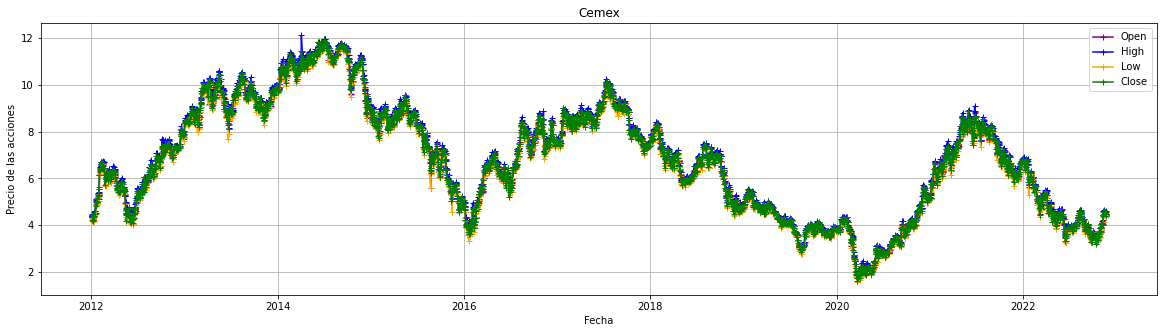

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(CemexHist['Open'], color='purple', marker='+', label='Open')
plt.plot(CemexHist['High'], color='blue', marker='+', label='High')
plt.plot(CemexHist['Low'], color='orange', marker='+', label='Low')
plt.plot(CemexHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Cemex')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
MDatos = CemexHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2012-01-03,4.342885,4.420853,4.335088,4.366275
2012-01-04,4.366275,4.459838,4.280510,4.428651
2012-01-05,4.389666,4.405260,4.303900,4.342885
2012-01-06,4.374072,4.413057,4.179149,4.233728
2012-01-09,4.241525,4.280510,4.132368,4.163556
...,...,...,...,...
2022-11-17,4.460000,4.530000,4.450000,4.500000
2022-11-18,4.550000,4.550000,4.470000,4.500000
2022-11-21,4.430000,4.460000,4.370000,4.400000


In [9]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2012-01-03,4.342885,4.420853,4.335088,4.366275
2012-01-04,4.366275,4.459838,4.280510,4.428651
2012-01-05,4.389666,4.405260,4.303900,4.342885
2012-01-06,4.374072,4.413057,4.179149,4.233728
2012-01-09,4.241525,4.280510,4.132368,4.163556
...,...,...,...,...
2022-11-17,4.460000,4.530000,4.450000,4.500000
2022-11-18,4.550000,4.550000,4.470000,4.500000
2022-11-21,4.430000,4.460000,4.370000,4.400000


### Aplicación del algoritmo

In [10]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [11]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,4.342885,4.420853,4.335088
1,4.366275,4.459838,4.280510
2,4.389666,4.405260,4.303900
3,4.374072,4.413057,4.179149
4,4.241525,4.280510,4.132368
...,...,...,...
2738,4.460000,4.530000,4.450000
2739,4.550000,4.550000,4.470000
2740,4.430000,4.460000,4.370000
2741,4.450000,4.490000,4.410000


In [12]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,4.366275
1,4.428651
2,4.342885
3,4.233728
4,4.163556
...,...
2738,4.500000
2739,4.500000
2740,4.400000
2741,4.470000


Se hace la división de los datos

In [13]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [14]:
pd.DataFrame(X_test)

,0,1,2
0,11.603339,11.638421,11.533175
1,6.659274,6.659274,6.205457
2,6.905914,6.955242,6.748065
3,8.611542,8.798044,8.570998
4,3.600000,3.730000,3.600000
...,...,...,...
544,7.900000,8.240000,7.740000
545,6.500000,6.510000,6.290000
546,9.844080,10.022474,9.844080
547,5.181521,5.343698,5.092325


Se entrena el modelo

In [30]:
#PronosticoAD = DecisionTreeRegressor(random_state=0)
#PronosticoAD.fit(X_train, Y_train)

PronosticoAD = DecisionTreeRegressor(max_depth=8, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoAD.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=8,
                      random_state=0)

In [26]:
#Se genera el pronóstico
Y_Pronostico = PronosticoAD.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,11.585797
1,6.296407
2,6.914364
3,8.727163
4,3.724261
...,...
544,8.036852
545,6.345626
546,9.878839
547,5.159328


In [31]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
11.585797,11.594568
6.296407,6.363307
6.914364,6.826989
8.727163,8.708847
3.724261,3.710000
...,...
8.036852,8.070000
6.345626,6.370000
9.878839,9.957603
5.159328,5.278827


In [32]:
r2_score(Y_test, Y_Pronostico)

0.9985112470058883

In [33]:
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [1.91600191e-04 2.52729030e-01 7.47079370e-01]
MAE: 0.0693
MSE: 0.0083
RMSE: 0.0914
Score: 0.9985


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9972, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.7% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 3.05 y 1.74 unidades del valor real, esto es, MSE y RMSE, respectivamente.

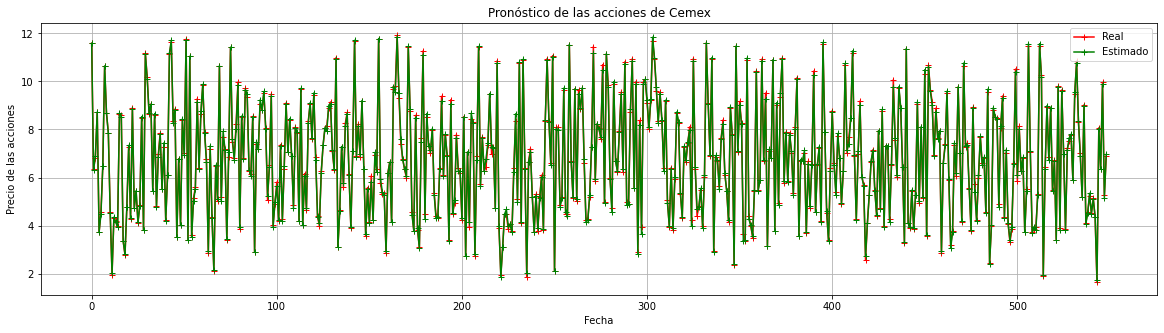

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Cemex')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
2,Low,0.747079
1,High,0.252729
0,Open,0.000192


#### **Conformación del árbol**

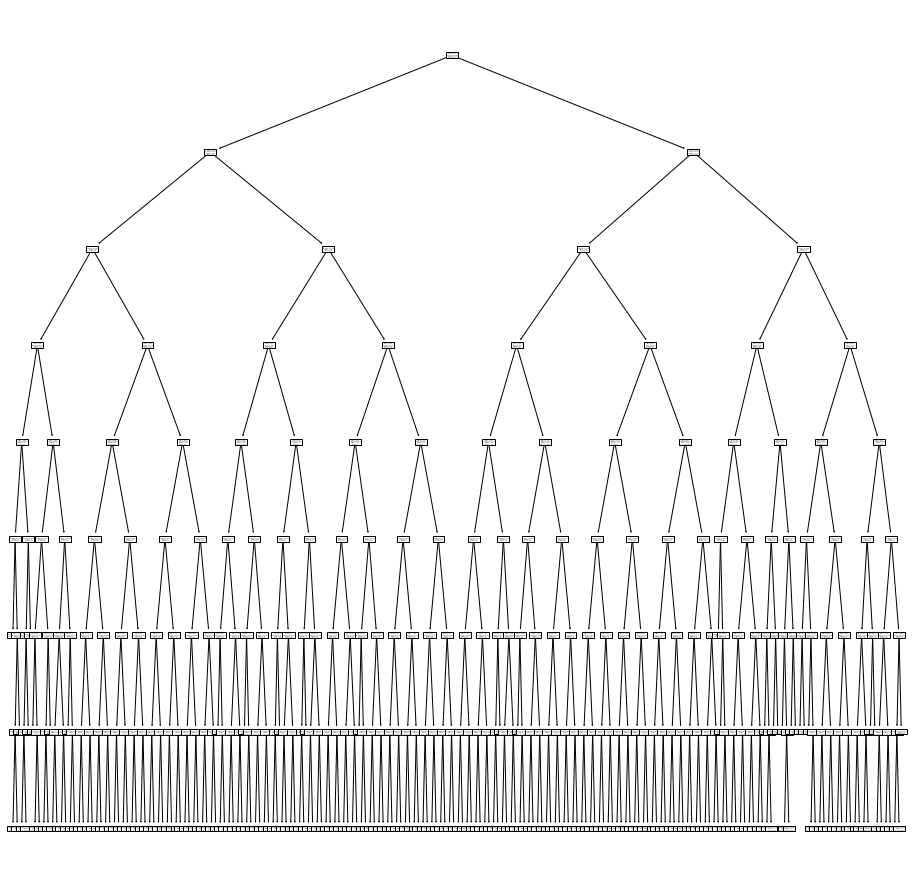

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
plt.show()

In [37]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- Low <= 6.72
|   |--- High <= 5.03
|   |   |--- High <= 3.48
|   |   |   |--- High <= 2.57
|   |   |   |   |--- High <= 2.12
|   |   |   |   |   |--- Low <= 1.74
|   |   |   |   |   |   |--- value: [1.74]
|   |   |   |   |   |--- Low >  1.74
|   |   |   |   |   |   |--- High <= 2.01
|   |   |   |   |   |   |   |--- Low <= 1.84
|   |   |   |   |   |   |   |   |--- value: [1.88]
|   |   |   |   |   |   |   |--- Low >  1.84
|   |   |   |   |   |   |   |   |--- value: [1.91]
|   |   |   |   |   |   |--- High >  2.01
|   |   |   |   |   |   |   |--- value: [1.99]
|   |   |   |   |--- High >  2.12
|   |   |   |   |   |--- Low <= 2.22
|   |   |   |   |   |   |--- Low <= 2.12
|   |   |   |   |   |   |   |--- Low <= 1.93
|   |   |   |   |   |   |   |   |--- value: [2.05]
|   |   |   |   |   |   |   |--- Low >  1.93
|   |   |   |   |   |   |   |   |--- value: [2.11]
|   |   |   |   |   |   |--- Low >  2.12
|   |   |   |   |   |   |   |--- value: [2.21]
|   |   |   |   |   |--- Low >  2.22
| 

#### **Nuevos pronósticos**

In [38]:
PrecioAccion = pd.DataFrame({'Open': [4.54],
                             'High': [4.58], 
                             'Low': [4.52]})
PronosticoAD.predict(PrecioAccion)

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([4.55587101])

### Incluyendo la variable volumen

In [39]:
MDatosP = CemexHist.drop(columns = ['Dividends', 'Stock Splits'])
MDatosP

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,4.342885,4.420853,4.335088,4.366275,22231529
2012-01-04,4.366275,4.459838,4.280510,4.428651,30384865
2012-01-05,4.389666,4.405260,4.303900,4.342885,24282231
2012-01-06,4.374072,4.413057,4.179149,4.233728,29589232
2012-01-09,4.241525,4.280510,4.132368,4.163556,16019571
...,...,...,...,...,...
2022-11-17,4.460000,4.530000,4.450000,4.500000,6641900
2022-11-18,4.550000,4.550000,4.470000,4.500000,2148300
2022-11-21,4.430000,4.460000,4.370000,4.400000,1655400


In [40]:
XP = np.array(MDatosP[['Open',
                     'High',
                     'Low',
                     'Volume']])
pd.DataFrame(XP)

,0,1,2,3
0,4.342885,4.420853,4.335088,22231529.0
1,4.366275,4.459838,4.280510,30384865.0
2,4.389666,4.405260,4.303900,24282231.0
3,4.374072,4.413057,4.179149,29589232.0
4,4.241525,4.280510,4.132368,16019571.0
...,...,...,...,...
2738,4.460000,4.530000,4.450000,6641900.0
2739,4.550000,4.550000,4.470000,2148300.0
2740,4.430000,4.460000,4.370000,1655400.0
2741,4.450000,4.490000,4.410000,1603900.0


In [41]:
YP = np.array(MDatosP[['Close']])
pd.DataFrame(YP)

,0
0,4.366275
1,4.428651
2,4.342885
3,4.233728
4,4.163556
...,...
2738,4.500000
2739,4.500000
2740,4.400000
2741,4.470000


In [43]:
XP_train, XP_test, YP_train, YP_test = model_selection.train_test_split(XP, YP, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [44]:
pd.DataFrame(XP_test)

,0,1,2,3
0,11.603339,11.638421,11.533175,6855371.0
1,6.659274,6.659274,6.205457,17851800.0
2,6.905914,6.955242,6.748065,6179100.0
3,8.611542,8.798044,8.570998,16128803.0
4,3.600000,3.730000,3.600000,3577700.0
...,...,...,...,...
544,7.900000,8.240000,7.740000,12841000.0
545,6.500000,6.510000,6.290000,8168600.0
546,9.844080,10.022474,9.844080,14671252.0
547,5.181521,5.343698,5.092325,13627607.0


In [59]:
#PronosticoPAD = DecisionTreeRegressor(random_state=0)
#PronosticoPAD.fit(XP_train, YP_train)

PronosticoPAD = DecisionTreeRegressor(max_depth=8, min_samples_split=8, min_samples_leaf=4, random_state=0)
PronosticoPAD.fit(XP_train, YP_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=8,
                      random_state=0)

In [60]:
#Se genera el pronóstico
YP_Pronostico = PronosticoPAD.predict(XP_test)
pd.DataFrame(YP_Pronostico)

,0
0,11.596761
1,6.392493
2,6.898237
3,8.695307
4,3.666635
...,...
544,7.893247
545,6.392493
546,9.886812
547,5.157918


In [61]:
ValoresP = pd.DataFrame(YP_test, YP_Pronostico)
ValoresP

,0
11.596761,11.594568
6.392493,6.363307
6.898237,6.826989
8.695307,8.708847
3.666635,3.710000
...,...
7.893247,8.070000
6.392493,6.370000
9.886812,9.957603
5.157918,5.278827


In [62]:
r2_score(YP_test, YP_Pronostico)

0.9984974844582081

In [63]:
print('Criterio: \n', PronosticoPAD.criterion)
print('Importancia variables: \n', PronosticoPAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(YP_test, YP_Pronostico))
print("MSE: %.4f" % mean_squared_error(YP_test, YP_Pronostico))
print("RMSE: %.4f" % mean_squared_error(YP_test, YP_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(YP_test, YP_Pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [1.80999005e-04 2.50452780e-01 7.49336087e-01 3.01338535e-05]
MAE: 0.0677
MSE: 0.0084
RMSE: 0.0918
Score: 0.9985


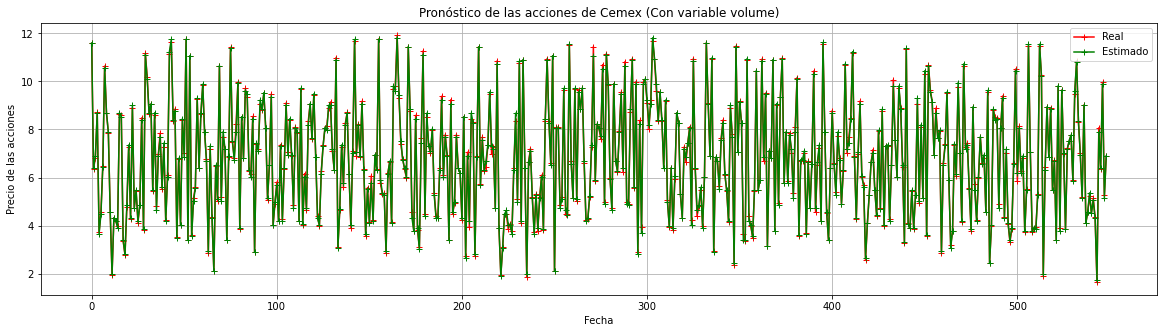

In [64]:
plt.figure(figsize=(20, 5))
plt.plot(YP_test, color='red', marker='+', label='Real')
plt.plot(YP_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Cemex (Con variable volume)')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
ImportanciaP = pd.DataFrame({'Variable': list(MDatosP[['Open', 'High', 'Low', 'Volume']]),
                            'Importancia': PronosticoPAD.feature_importances_}).sort_values('Importancia', ascending=False)
ImportanciaP

,Variable,Importancia
2,Low,0.749336
1,High,0.250453
0,Open,0.000181
3,Volume,0.000030


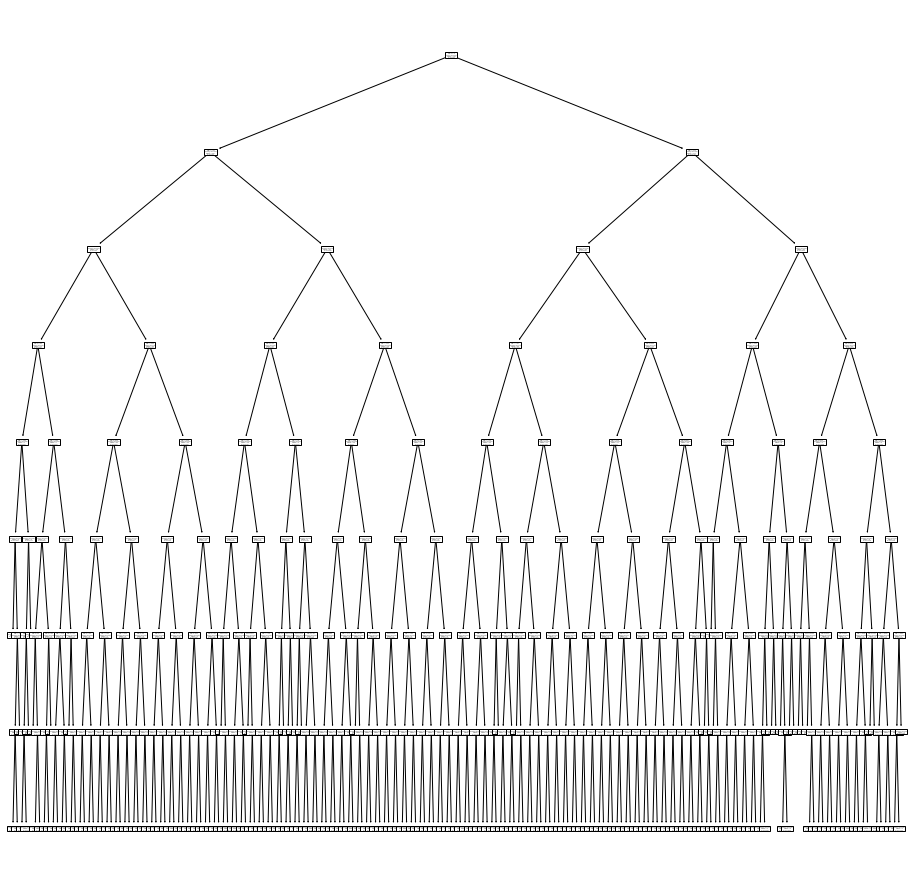

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(PronosticoPAD, feature_names = ['Open', 'High', 'Low', 'Volume'])
plt.show()